<a href="https://colab.research.google.com/github/Chen-Portfolio/Customer-Segmentation-by-Hierarchial-Clustering-and-K-Means-Clustering-with-PCA/blob/main/Customer_Segmentation_Project_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation
### Dataset: contains info. of 2000 individuals fm a given area regarding the customers' demographical information.
#### # Have preprocessed the data encoded all variables numerically and dealt with missing vales

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Importing the dataset

In [4]:
dataset = pd.read_csv('segmentation data.csv', index_col = 'ID')

## Exploring the dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [6]:
dataset.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Exploring correlation betw.features (Pearson Correlation)
#### # Generally correlation describes the linear dependency betw. varilabe ranged -1 to 1

In [7]:
dataset.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


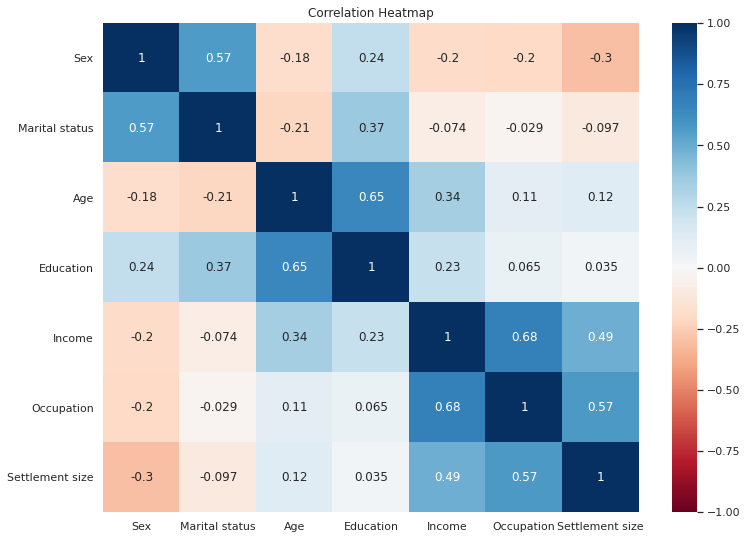

In [8]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(dataset.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

##### # Positive relationship: 
(Sex vs Marital Status), (Age vs Education), (Age vs Income) (Occupation vs Income), (Occupation vs Settlement size)

## Visualize Raw data

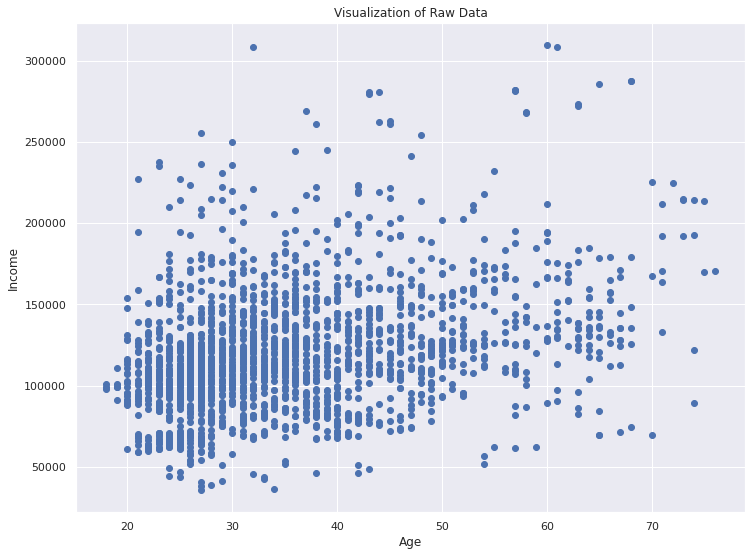

In [9]:
plt.figure(figsize = (12, 9))
plt.scatter(dataset.iloc[:, 2], dataset.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')
plt.show()

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_std = sc.fit_transform(dataset)

In [6]:
dataset_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [12]:
dataset_std_df = pd.DataFrame(dataset_std)
print(dataset_std_df)

             0         1         2         3         4         5         6
0    -0.917399 -0.993024  2.653614  1.604323  0.097524  0.296823  1.552326
1     1.090038  1.007025 -1.187132 -0.063372  0.782654  0.296823  1.552326
2    -0.917399 -0.993024  1.117316 -0.063372 -0.833202 -1.269525 -0.909730
3    -0.917399 -0.993024  0.775916 -0.063372  1.328386  0.296823  0.321298
4    -0.917399 -0.993024  1.458716 -0.063372  0.736932  0.296823  0.321298
...        ...       ...       ...       ...       ...       ...       ...
1995  1.090038 -0.993024  0.946616 -0.063372  0.067471 -1.269525 -0.909730
1996  1.090038  1.007025 -0.760382 -0.063372 -0.084265  0.296823 -0.909730
1997 -0.917399 -0.993024 -0.418983 -1.731068 -0.906957 -1.269525 -0.909730
1998  1.090038  1.007025 -1.016432 -0.063372 -0.603329 -1.269525 -0.909730
1999 -0.917399 -0.993024 -0.931082 -1.731068 -1.378987 -1.269525 -0.909730

[2000 rows x 7 columns]


## Hierarchical clustering

##### # A hierarchical clustering may take minutes or even hours to compute, slow so not practicl, but it has one major advantage over other methods -> it findes the number of clusters in data.
##### # In practice, starting with Hierarchical clustering to determine clusters, then move on to Flat clustering for segmentation

### Using the dendrogram to find the optimal number of clusters

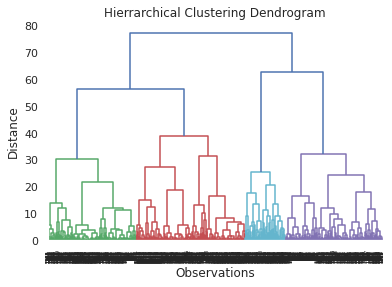

In [13]:
import scipy.cluster.hierarchy as sch
hier_clust = sch.linkage(dataset_std, method = 'ward')  # Performs hierarchical clustering on the data and returns the clustering resluts(matrix) as the so-called 'linkage matrix'.
dendrogram = sch.dendrogram(hier_clust)
# plt.figure(figsize = (12, 9))
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.title('Hierrarchical Clustering Dendrogram')
plt.show()

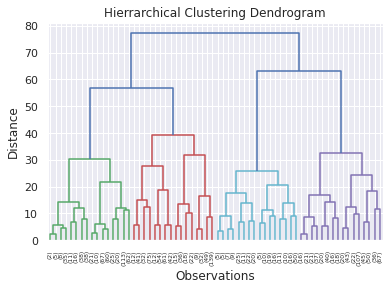

In [14]:
import scipy.cluster.hierarchy as sch
hier_clust = sch.linkage(dataset_std, method = 'ward')  # Performs hierarchical clustering on the data and returns the clustering resluts as the so-called 'linkage matrix'.
dendrogram = sch.dendrogram(hier_clust,truncate_mode ='level', p = 5 )  # set up trancate_mode and p=5 makes the plot less crowded
# plt.figure(figsize = (12, 9))
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.title('Hierrarchical Clustering Dendrogram')
plt.show()


In [15]:
hier_clust

array([[4.78000000e+02, 1.95700000e+03, 3.41213651e-04, 2.00000000e+00],
       [6.73000000e+02, 8.21000000e+02, 3.93708059e-04, 2.00000000e+00],
       [8.67000000e+02, 9.33000000e+02, 8.92404934e-04, 2.00000000e+00],
       ...,
       [3.99200000e+03, 3.99500000e+03, 5.67337517e+01, 1.18000000e+03],
       [3.99000000e+03, 3.99400000e+03, 6.30691755e+01, 8.20000000e+02],
       [3.99600000e+03, 3.99700000e+03, 7.73495855e+01, 2.00000000e+03]])

## K-Means Clustering
## Using the elbow method to find the optimal number of clusters
##### # choose 10 clusters to check wcss -> 4 is the "Elbow"

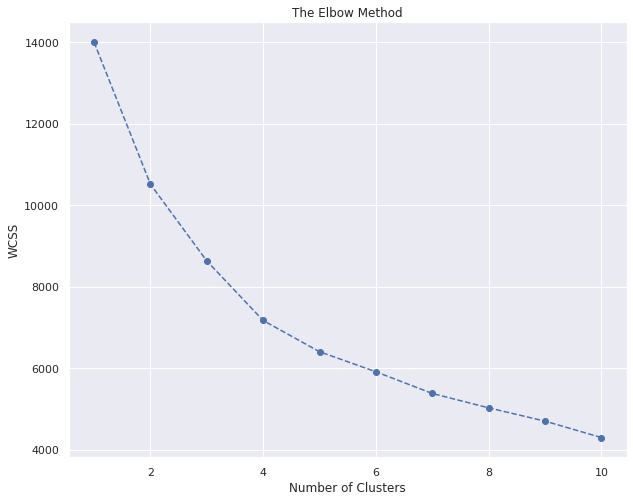

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(dataset_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()    

## Training the K-Means model on the dataset

In [9]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(dataset_std)

In [25]:
print(y_kmeans)

[1 0 3 ... 3 0 3]


## Analyzing the results
### Labeling the specific cluster for each row

In [10]:
dataset_segm_kmeans = dataset.copy()
dataset_segm_kmeans['Segment K-means'] = kmeans.labels_

In [30]:
dataset_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,0
100000003,0,0,49,1,89210,0,0,3
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2


### Calculating the Mean value for each Cluster
### Comparison betw. clusters by mean values, and give each cluster a representative name

In [12]:
dataset_segm_analysis = dataset_segm_kmeans.groupby('Segment K-means').mean()
dataset_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290


##### # **Cluster0**: male and female almost equally,the oldest segment,more than two thirds in relationsip,highest level Educationa and Income -> **Well-off**
##### # **Cluster1**: most female, the youngest, in relationship, medium level Educaiton, average Income, middle skilled Occupation, equally distributed betw.small and mid-sized city -> **Standard**
##### # **Cluster2**: almost entirely men, less than 20% in relationship, low level Education paired with high level Income and Occupation, in big or mid-sized city -> **Career focused**
##### # **Cluster3**: two thirds male, almost all single, the education level low, the lowest Income and Occupation, live in small cities -> **Fewer opportunities**

### Calculating number of rows and proportions for each cluster

In [16]:
dataset_segm_analysis['N Obs'] = dataset_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()
dataset_segm_analysis   # In the 'groupby', need to include a 2nd argument(column) in order to count each row in the table(can choose an arbitrary column)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs
Segment K-means,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462


In [17]:
dataset_segm_analysis['Prop Obs'] = dataset_segm_analysis['N Obs'] / dataset_segm_analysis['N Obs'].sum()
dataset_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310


### Rename the segments

In [19]:
dataset_segm_analysis.rename({0: 'Well-off', 1: 'Standard', 2: 'Career focused', 3: 'Fewer opportunites'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
Well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Fewer opportunites,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310


## Visualize raw data with segment  names

In [20]:
dataset_segm_kmeans['Labels'] = dataset_segm_kmeans['Segment K-means'].map({0: 'Well-off', 1: 'Standard', 2: 'Career focused', 3: 'Fewer opportunites'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


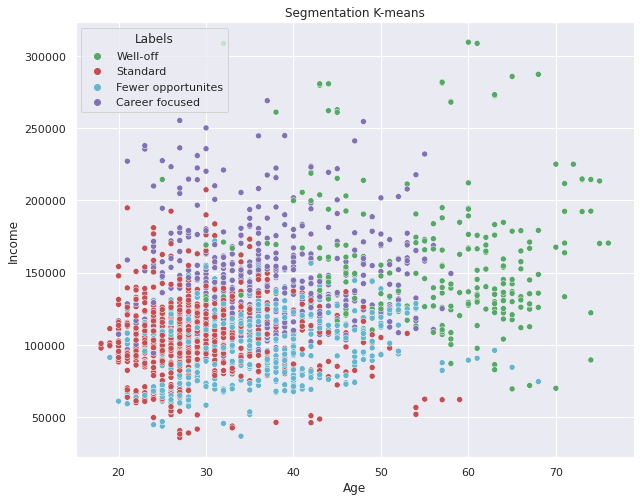

In [25]:
plt.figure(figsize = (10,8))
x_axis = dataset_segm_kmeans['Age']
y_axis = dataset_segm_kmeans['Income']
sns.scatterplot(x_axis, y_axis, hue = dataset_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

##### # We can see the green segment 'Well-off'is clearly seperated as it's highest in both Age and Income, but the other three segments are grouped together so it's harder to get more insight just by looking at the plot.
We can conclude that K-means did a decent job at sepearting our data into clusters, however, the result is far from perfect

## Principle Component Analysis(PCA)

##### # PCA creates as many components as there are features in the data, in this case-7; moreover, these components are arranged in order of importance








In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(dataset_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

##### # PCA applied a linear transformation on the data which created 7 new variables, some of them contain a large proportion of the variance while others almost none, together these 7 components explain 100% of the variability of the data (Components' variance always sum up to 1)
##### # Find a subset of components while preserving as much info. as possible
##### # Logically, include the most prominent components, if choosing 2, we'd choose the first two as they contain most of the variance 

### Plot a line chart showing the cumulative explained variance against the number of components chosen.

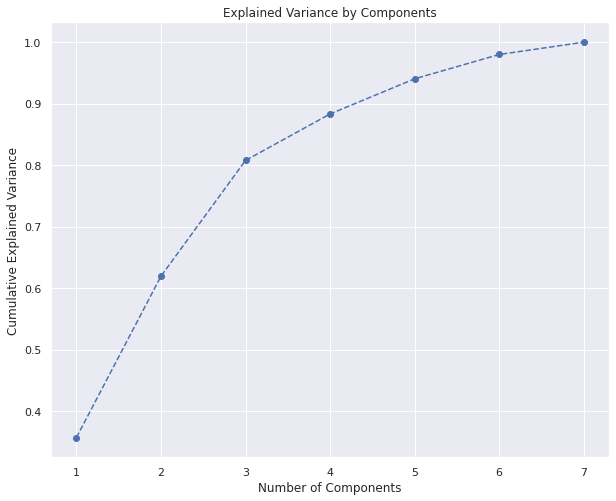

In [28]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

##### # Rule of thumb: keep 80% of the variance. 
##### # In this case, keeping 3 or 4 makes sense.

In [30]:
pca = PCA(n_components = 3)
pca.fit(dataset_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### PCA Results

In [32]:
pca.components_    # reduced the features to 3 components fm original 7

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])






> The values themselves show the so-called 'Loadings' - correlations betw. an original variable and a component ( -1 to 1). eg: 1st value of the array shows the loading of 1st feature on 1st component


> the closer a result to 0 the lower the loading of a variable onto a component














In [33]:
dataset_pca_comp = pd.DataFrame(data = pca.components_, columns = dataset.columns.values, index = ['Component 1', 'Component 2', 'Component 3'])
dataset_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


##### # Component 1: Career
##### # Component 2: Education & Lifestyle
##### # Component 3: Experience

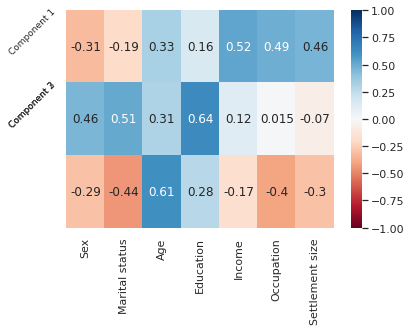

In [35]:
sns.heatmap(dataset_pca_comp, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True)
plt.yticks([0, 1, 1], ['Component 1', 'Component 2', 'Component 3'], rotation = 45, fontsize = 9)
plt.show()

### Transform the original data with 7 dimension into 3 dimension

In [38]:
pca.transform(dataset_std)    # A new array, each observation is described by the 3 components the new values in the array are called PCA Scores

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [39]:
scores_pca = pca.transform(dataset_std)

## K-means clustering with PCA
##### # Segment data using K-means clustering using the 3 components as features

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

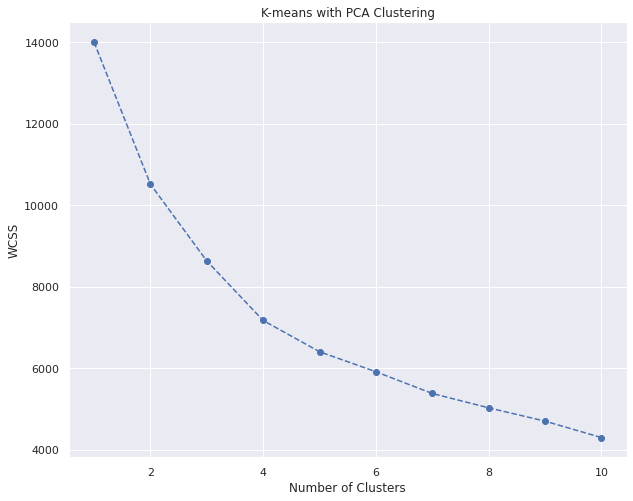

In [40]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('K-means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()  

##### # The result is the same - still choose 4 clusters







In [41]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### K-means clustering with PCA Results

In [52]:
dataset_segm_pca_kmeans = pd.concat([dataset.reset_index(drop=True), pd.DataFrame(scores_pca)], axis =1)
dataset_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
dataset_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
dataset_segm_pca_kmeans 


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [46]:
#dataset.reset_index().head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [47]:
#dataset.reset_index(drop=True).head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [53]:
dataset_segm_pca_kmeans_freq = dataset_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
dataset_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


##### # Cluster 0: Well-off
##### # Cluster 1: Fewer opportunites
##### # Cluster 2: Standard
##### # Cluster 3: Career focused

In [54]:
dataset_segm_pca_kmeans_freq['N Obs'] = dataset_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()
dataset_segm_pca_kmeans_freq['Prop Obs'] = dataset_segm_pca_kmeans_freq['N Obs'] / dataset_segm_pca_kmeans_freq['N Obs'].sum()
dataset_segm_pca_kmeans_freq = dataset_segm_pca_kmeans_freq.rename({0:'Well-off', 1:'Fewer opportunities', 2:'Standard', 3:'Career focused'})
dataset_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
Well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,263,0.1315
Fewer opportunities,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,705,0.3525
Standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,570,0.2850
Career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,462,0.2310


In [56]:
  dataset_segm_pca_kmeans['Legend'] = dataset_segm_pca_kmeans['Segment K-means PCA'].map({0:'Well-off', 1:'Fewer opportunities', 2:'Standard', 3:'Career focused'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


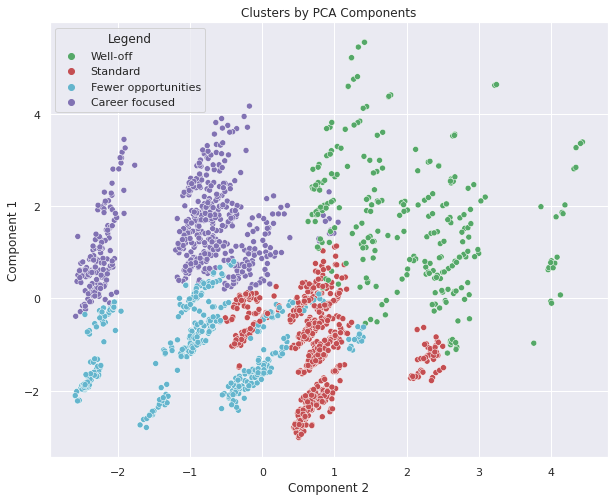

In [62]:
x_axis = dataset_segm_pca_kmeans['Component 2']
y_axis = dataset_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = dataset_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

##### # One of the biggest goals of PCA is to reduce the number of variables by combining them into bigger more meaningful features
##### # Compared to K-means clusters w/o PCA, this way makes all four clusters clearly seperated; the overlap betw. red and blue are ultimately determined by the 3rd component which is not available on the graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


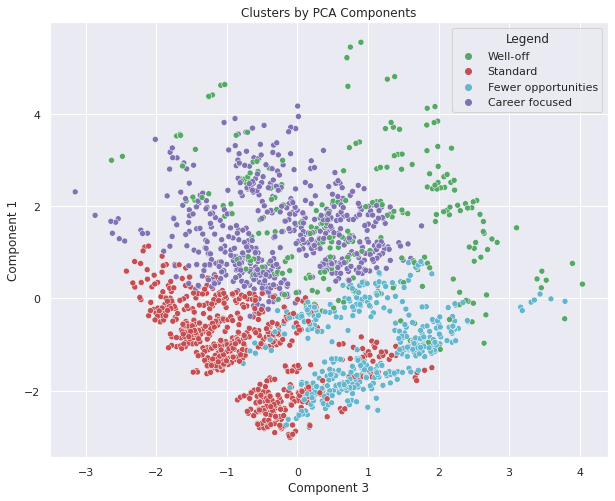

In [63]:
x_axis = dataset_segm_pca_kmeans['Component 3']
y_axis = dataset_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = dataset_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


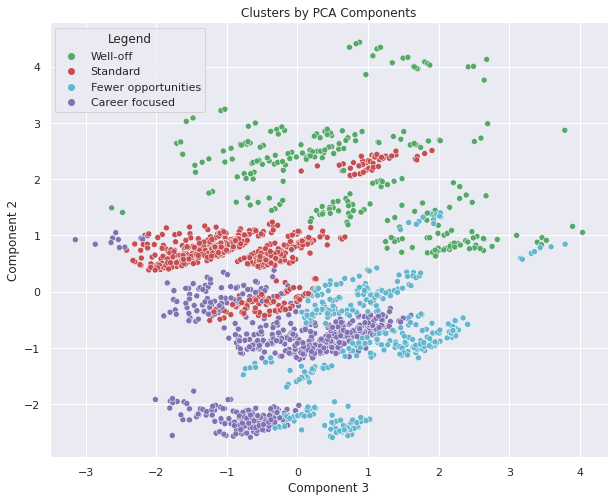

In [64]:
x_axis = dataset_segm_pca_kmeans['Component 3']
y_axis = dataset_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = dataset_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

## Data Export

In [65]:
import pickle    # Pickle is a module used to turn Python objects into strings

#### # We need the scaler to preprocess future data in the same way

In [67]:
pickle.dump(sc, open('scale.pickle','wb'))     # dump is the commmand indicating we want to export a file
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))